# Relative abundance trace graphs

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(phyloseq)
library(ggplot2)
library(plyr)
library(dplyr)
library(RColorBrewer)
library(gridExtra)
library(VennDiagram)

/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching package: ‘gridExtra’


  warnings.warn(x,

# Load data

In [4]:
%%R
# Load responder datatable
log2foldFile = '/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/DeSeq2/bare-plant.csv'

# use non-rarified relative abundance phylogseq object for consistency with DeSeq
F = file.path('/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/Full-Sparsity3in3_relabund')

physeq.Full = readRDS(F)
physeq.Full = filter_taxa(physeq.Full, function(x) sum(x > 0) > 0, TRUE)




## set ggplot theme

In [5]:
# %%R
# theme_pub = function (base_size = 11, base_family = "Helvetica") 
# {
#     theme_grey(base_size = base_size, base_family = base_family) %+replace% 
#         theme(
#             axis.line.x = element_line(size = .5),
#             axis.line.y = element_line(size = .5),
#             panel.background = element_rect(fill = "white", colour = NA), 
#             panel.border = element_rect(fill = NA, color = "black", size = .5), 
#             panel.grid.major = element_blank(), 
#             panel.grid.minor = element_blank(), 
#             strip.background = element_rect(fill = "grey85", 
#                 colour = "grey20"), 
#             legend.key = element_rect(fill = "white", 
#                 colour = NA), complete = TRUE)
# }

In [6]:
%%R
theme_pubdbl = function (base_size = 22, base_family = "Helvetica") 
{
    theme_grey(base_size = base_size, base_family = base_family) %+replace% 
        theme(
            line = element_line(colour = "black", size = 2, linetype = 1, 
            lineend = "butt"), 
            rect = element_rect(fill = "white", colour = "black", size = 2, linetype = 1), 
            text = element_text(family = base_family, face = "plain", 
                                colour = "black", size = base_size, lineheight = 0.9, 
                                hjust = 0.5, vjust = 0.5, angle = 0, margin = margin(), 
                                debug = FALSE),

            axis.line.x = element_line(size = 1),
            axis.line.y = element_line(size = 1),
            panel.background = element_rect(fill = "white", colour = NA), 
            panel.border = element_rect(fill = NA, color = "black"), 
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(), 
            strip.background = element_rect(fill = "grey85", 
                colour = "grey20"), 
            legend.key = element_rect(fill = "white", 
                colour = NA), complete = TRUE)
}

# Venn Diagram of OTU occurance

In [7]:
%%R
# merge samples by sample type (rhizosphere vs baresoil) and convert to PA
phy.2pa = NULL 
phy.2pa = physeq.Full %>%
    merge_samples("Planted") %>%
    transform_sample_counts(function(x) ifelse(x == 0,0,1) ) %>%
    otu_table %>%  t() %>% as.data.frame 

  head(phy.2pa)  
    


         BARE Rhizosphere
OTU.4087    1           1
OTU.2009    1           1
OTU.5899    1           1
OTU.4181    1           1
OTU.3052    1           1
OTU.1890    1           1


In [8]:
%%R

barecount = filter(phy.2pa, BARE == 1) %>% nrow
plantcount = filter(phy.2pa, Rhizosphere == 1) %>% nrow
sharedcount = filter(phy.2pa, Rhizosphere == 1 & BARE == 1) %>% nrow
#check rhizosphere OTUs not in bare soil
filter(phy.2pa, Rhizosphere == 0 & BARE == 1) %>% nrow
barecount

[1] 4928


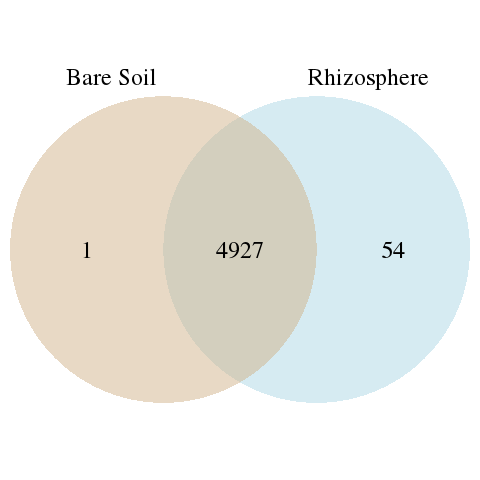

In [9]:
%%R
# Draw venn diagrame
# caution, ordering of labels and colors is backward, always check against actual counts 
# to confirm interpretations

grid.newpage()
pV = draw.pairwise.venn(area1 = plantcount, area2 = barecount, cross.area = sharedcount,
                   category = c("Bare Soil", "Rhizosphere"), lty = rep("blank", 2), 
                 fill = c("lightblue", "tan"), alpha = rep(0.5, 2), cex = 2,
                   cat.dist = .15, cat.cex = 2, scaled = FALSE, rotation.degree = 180) %>% grobTree


#  Bare soils by time graph

In [10]:
%%R
physeq.Bare = subset_samples(physeq.Full, Type == "BARE", TRUE)
mdf = psmelt(physeq.Bare)
physeq.Bare = NULL
head(mdf)

          OTU            Sample  Abundance          X.sample Library
34714  OTU.12 sample8-3.07_Npos 0.02789850 sample8-3.07_Npos       2
246137  OTU.6 sample8-3.07_Npos 0.02523482 sample8-3.07_Npos       2
246087  OTU.6 sample6-2.05_Npos 0.02493613 sample6-2.05_Npos       2
246118  OTU.6 sample2-2.05_Npos 0.02408155 sample2-2.05_Npos       1
246142  OTU.6 sample8-2.05_Npos 0.02323952 sample8-2.05_Npos       2
246109  OTU.6 sample4-1.06_Npos 0.02293637 sample4-1.06_Npos       2
       Primer_Plate Primer_Well_ID primerFR_ID_byPlate primerFR_ID_total
34714             1             F7                  54                54
246137            1             F7                  54                54
246087            1             F1                   6                 6
246118            1            B10                  74                74
246142            1             D7                  52                52
246109            1             E1                   5                 5
      

In [11]:
%%R
# split dataframe by day and OTU, sumarize mean abundance
mdf.byday = ddply(mdf, .(DAP, OTU), summarize, mean_day_abundance = mean(Abundance))
head(mdf.byday)

  DAP       OTU mean_day_abundance
1  36    OTU.10       1.881108e-03
2  36   OTU.100       2.943948e-03
3  36  OTU.1000       5.313401e-05
4  36 OTU.10004       1.019494e-04
5  36 OTU.10009       2.386498e-06
6  36  OTU.1001       0.000000e+00


In [12]:
%%R
#Order by day, then rank abundance within day
mdf.byday = mdf.byday[order( mdf.byday$DAP, -mdf.byday$mean_day_abundance),]
#Subset to first bulk soil day
mdf.36 = subset(mdf.byday, DAP == 36)

mdf.36$Rank = rank(-mdf.36$mean_day_abundance, ties.method = "random")
mdf.byday.ranked = join(mdf.byday, mdf.36[,c("OTU","Rank")], by = "OTU")

head(mdf.byday.ranked)

  DAP    OTU mean_day_abundance Rank
1  36  OTU.6        0.017623251    1
2  36 OTU.28        0.011306851    2
3  36 OTU.11        0.009433516    3
4  36 OTU.12        0.008705002    4
5  36 OTU.47        0.008015766    5
6  36 OTU.13        0.007286370    6


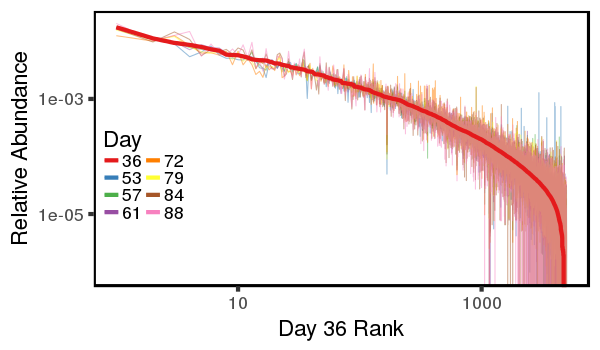

In [13]:
%%R -w 600 -h 350
getPalette = colorRampPalette(brewer.pal(8, "Set1"))

p = ggplot(mdf.byday.ranked, aes(x = Rank, y = mean_day_abundance, color = factor(DAP))) 

#p = p + geom_vline(data = d.rhiz, aes(xintercept = Rank), color = "#377eb8", alpha = 0.25, size = 1)
#p = p + geom_vline(data = d.xyl, aes(xintercept = Rank), color = "#4daf4a", alpha = 0.25, size = 1)

p = p + geom_line(alpha = 0.5, size = 0.5) 

#p = p + geom_rug(data = d.cell, color = "black", sides = "b", size = 1.25)
#p = p + geom_rug(data = d.rhiz, color = "black", sides = "t", size = 1.25)

p = p + geom_line(data = subset(mdf.byday.ranked, DAP == 36), size = 2)

p = p + scale_color_manual(values=getPalette(8))

p = p + scale_y_log10()

p = p + scale_x_log10()

p = p + theme_pubdbl()

p = p + labs(x = "Day 36 Rank", y = "Relative Abundance", color = "Day")
p = p + theme(legend.position = c(.10, .40), legend.text = element_text(size = 18))
p = p + guides(color=guide_legend(ncol=2))

p1 = p
p1

# Now rhizosphere plots

## Plot day 84 with 84 rank abundance as baseline

In [14]:
%%R
physeq.Plant = subset_samples(physeq.Full, DAP == 84 , TRUE)

mdf = psmelt(physeq.Plant)
physeq.Plant = NULL



In [15]:
%%R
# split dataframe by day and OTU, sumarize mean abundance
mdf.byplant = ddply(mdf, .(Plant, OTU), summarize, mean_plant_abundance = mean(Abundance))
head(mdf.byplant)
physeq.Plant = subset_samples(physeq.Full, DAP == 84 , TRUE)

mdf = psmelt(physeq.Plant)
physeq.Plant = NULL





In [16]:
%%R
#Order by day, then rank abundance within day
mdf.byplant = mdf.byplant[order(mdf.byplant$Plant, -mdf.byplant$mean_plant_abundance),]

#Subset to first bulk soil day
mdf.bare = subset(mdf.byplant, Plant == "BARE")
mdf.bare$Rank = rank(-mdf.bare$mean_plant_abundance, ties.method = "random")
mdf.byplant.ranked = join(mdf.byplant, mdf.bare[,c("OTU","Rank")], by = "OTU")

head(mdf.byplant.ranked)

  Plant    OTU mean_plant_abundance Rank
1  BARE  OTU.6          0.016457203    1
2  BARE OTU.11          0.014640432    2
3  BARE OTU.12          0.010842170    3
4  BARE OTU.28          0.009796865    4
5  BARE OTU.58          0.007705291    5
6  BARE OTU.13          0.007292798    6


In [17]:
%%R
FDR = 0.05

# read rhizosphere log2fold change file and 
l2f = read.csv(log2foldFile, header = TRUE) 

df.l2fc.rspndr = l2f %>%
    filter(Day == 84 & log2FoldChange > 0) %>%
    group_by(OTU) %>%
     summarize(minP = min(p.adj)) %>% 
     filter(minP <= FDR)

In [18]:
%%R

d.rhiz = left_join(df.l2fc.rspndr, mdf.byplant.ranked)


/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Joining, by = "OTU"

  warnings.warn(x, RRuntimeWarning)


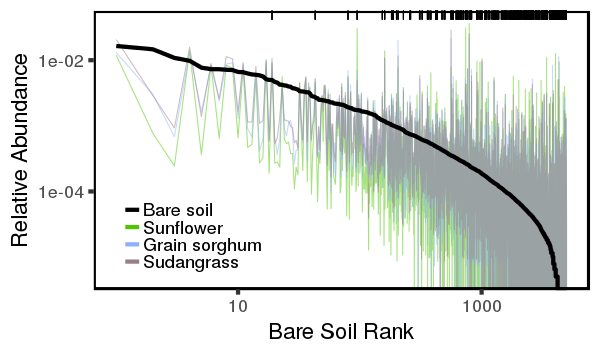

In [31]:
%%R -w 600 -h 350

#getPalette = colorRampPalette(brewer.pal(9, "Set1"))

p = ggplot(mdf.byplant.ranked, aes(x = Rank, y = mean_plant_abundance, color = Plant)) 

#p = p + geom_vline(data = d.rhiz, aes(xintercept = Rank), color = "#377eb8", alpha = 0.25, size = 1)
#p = p + geom_vline(data = d.xyl, aes(xintercept = Rank), color = "#4daf4a", alpha = 0.25, size = 1)

p = p + geom_line(alpha = 0.5, size = 0.5) 

#p = p + geom_rug(data = d.cell, color = "black", sides = "b", size = 1.25)
p = p + geom_rug(data = d.rhiz, color = "black", sides = "t", size = .5)

p = p + geom_line(data = subset(mdf.byplant.ranked, Plant == "BARE"), size = 2)

# set colors to be the same as ordinations
p = p + scale_color_manual(values=c("#000000","#4FC601", "#8FB0FF", "#997D87"), 
                           labels = c("Bare soil", "Sunflower", "Grain sorghum", "Sudangrass")) 


p = p + scale_y_log10()

p = p + scale_x_log10()

p = p + theme_pubdbl()

p = p + labs(x = "Bare Soil Rank", y = "Relative Abundance")

p = p + theme(legend.position = c(.20, .20), legend.text = element_text(size = 18), legend.title = element_blank())
p6 = p 
p6

# save as separate tiffs

* use double size
* set trace to width 9 inches and venn to 5.18, height = 5


In [20]:
%%R
tiff("/home/bryan/RhizCG/figures/ms_figures/bulktrace.tiff", width = 9, height = 5, units = "in", res = 300)
p1 %>% print
dev.off()

png 
  2 


In [32]:
%%R
tiff("/home/bryan/RhizCG/figures/ms_figures/rhiztrace.tiff", width = 9, height = 5, units = "in", res = 300)
p6 %>% print
dev.off()

png 
  2 


In [22]:
%%R
tiff("/home/bryan/RhizCG/figures/ms_figures/venn.tiff", width = 5.18, height = 5, units = "in", res = 300)
draw.pairwise.venn(area1 = plantcount, area2 = barecount, cross.area = sharedcount,
                   category = c("Bare Soil", "Rhizosphere"), lty = rep("blank", 2), 
                 fill = c("lightblue", "tan"), alpha = rep(0.5, 2), cex = 2,
                   cat.dist = .15, cat.cex = 2, scaled = FALSE, rotation.degree = 180)
dev.off()

png 
  2 


* layout and add labels in inkscape

In [23]:
%%R
sessionInfo()

R version 3.3.1 (2016-06-21)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu precise (12.04.5 LTS)

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      tools     stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
[1] VennDiagram_1.6.17  futile.logger_1.4.3 gridExtra_2.2.1    
[4] RColorBrewer_1.1-2  dplyr_0.5.0         plyr_1.8.4         
[7] ggplot2_2.2.0       phyloseq_1.18.0    

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.5          XVector_0.14.0       futile.options_1.0.0
 [4] iterators_1.0.8      zlibbioc_1.20.0      digest_0.6.10       
 [7] jsonlite_1.1       

# Sandbox

* erase when no longer needed

In [68]:
%%R
svg("/home/bryan/RhizCG/figures/ms_figures/test.svg", width = 3.045, height = 2)
p6 %>% print
dev.off()

png 
  2 


In [84]:
%%R
grid.arrange(pV, p1,NA, p6, ncol = 2, widths = c(1.5,2))

/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: There were 11 warnings (use warnings() to see them)
  warnings.warn(x, RRuntimeWarning)



Error in gList(list(name = "arrange.1-1-1-1", gp = NULL, vp = NULL, children = list( : 
  only 'grobs' allowed in "gList"


In [88]:
%%R
tiff("/home/bryan/RhizCG/figures/ms_figures/test_raster.tiff", width = 14.18, height = 8, units = "in", res = 300)
grid.arrange(pV, p1, p6, ncol = 2, widths = c(1.5,2,2))
dev.off()

/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 6: 
  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: In grob$wrapvp <- vp :
  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning:  Coercing LHS to a list

  warnings.warn(x, RRuntimeWarning)



Error in gList(list(name = "arrange.1-1-1-1", gp = NULL, vp = NULL, children = list( : 
  only 'grobs' allowed in "gList"


In [75]:
%%R
require(cowplot)

In [77]:
%%R
plot_grid(pV, p1, p6, ncol = 3, widths = c(1.5,2,2))


Error in ggplot_to_gtable(x) : 
  Argument needs to be of class "ggplot" or "gtable"


/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Error in ggplot_to_gtable(x) : 
  Argument needs to be of class "ggplot" or "gtable"

  warnings.warn(x, RRuntimeWarning)


TableGrob (1 x 3) "arrange": 3 grobs
  z     cells    name                 grob
1 1 (1-1,1-1) arrange gTree[GRID.gTree.20]
2 2 (1-1,2-2) arrange       gtable[layout]
3 3 (1-1,3-3) arrange       gtable[layout]


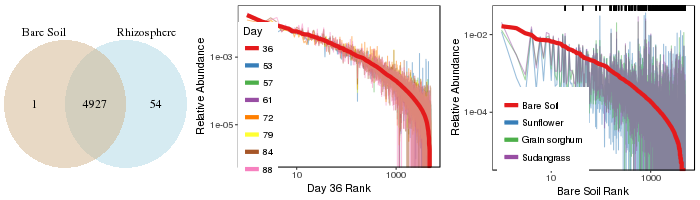

In [58]:
# %%R -w 700 -h 200
# Pthree = grid.arrange(pV, p1, p6, ncol = 3, widths = c(1.5,2,2))
# Pthree

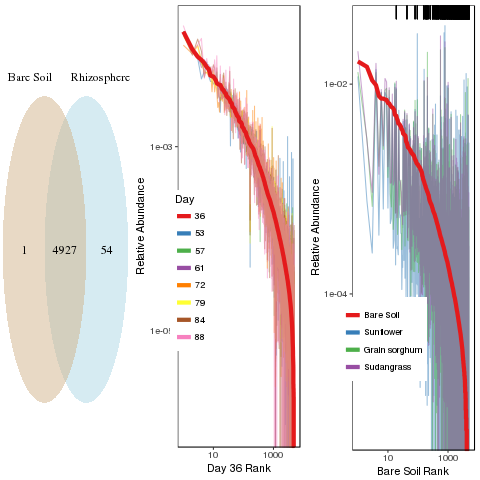

In [55]:
# %%R
# require(grid)
# require(gridExtra)
# p <- arrangeGrob(pV, p1, p6, ncol = 3, widths = c(1.5,2,2))
# grid.draw(p) # interactive device

# ggsave("/home/bryan/RhizCG/figures/ms_figures/trace_msVersion.pdf", p, width = 7.09, height = 2.5)


In [85]:
%%R
plot_grid(grobTree(pV), p1, NULL, p6, labels = c("(a)", "(b)", "", "(c)"), ncol = 2, align = "v")


Error in ggplot_to_gtable(x) : 
  Argument needs to be of class "ggplot" or "gtable"


In [274]:
%%R
plot2by1 <- plot_grid(p1, p6, labels = c("A", "B"), ncol = 1, align = "v")
save_plot("/home/bryan/RhizCG/figures/relabund_trace.pdf", plot2by1,
          ncol = 1, # we're saving a grid plot of 2 columns
          nrow = 2, # and 2 rows
          # each individual subplot should have an aspect ratio of 1.3
          base_aspect_ratio = 1.3
          )

In [51]:
%%R
# ggsave("/home/bryan/RhizCG/figures/ms_figures/trace_msVersion.pdf", width = 7.09, height = 2.5)

In [47]:
%%R
svg("/home/bryan/RhizCG/figures/ms_figures/trace_msVersion.svg", width = 7.09, height = 2.5)          #need final 80mm or 180mm = 3.15 inches or 7.09 inches
grid.arrange(pV, p1, p6, ncol = 3, widths = c(1.5,2,2))

dev.off()


png 
  2 


In [412]:
%%R -w 700 -h 600
g.b = textGrob("")
tiff("/home/bryan/RhizCG/figures/relabund_trace.tiff", width = 8, height = 6, units = "in", res = 150)
grid.arrange(pV, p1, p7, p6, widths = 2:3, ncol = 2)
dev.off()

png 
  2 


In [406]:
%%R
postscript(file = "/home/bryan/RhizCG/figures/relabund_trace.ps", width = 8, height = 6)
grid.arrange(pV, p1, g.b, p6, ncol = 2, widths = 2:3)
dev.off()


Error in grid.Call.graphics(L_text, as.graphicsAnnot(x$label), x$x, x$y,  : 
  family 'serif' not included in postscript() device


/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Error in grid.Call.graphics(L_text, as.graphicsAnnot(x$label), x$x, x$y,  : 
  family 'serif' not included in postscript() device

  warnings.warn(x, RRuntimeWarning)


# Arrange with cowplot

In [345]:
%%R
grid.arrange(pV), p1, p6, ncol = 2)

/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Error in gList(list(name = "arrange.1-1-1-1", gp = NULL, vp = NULL, children = list( : 
  only 'grobs' allowed in "gList"

  warnings.warn(x, RRuntimeWarning)



Error in gList(list(name = "arrange.1-1-1-1", gp = NULL, vp = NULL, children = list( : 
  only 'grobs' allowed in "gList"


In [86]:
%%R
plot_grid(grobTree(pV), p1, NULL, p6, labels = c("A", "B", "", "C"), ncol = 2, align = "v")


Error in ggplot_to_gtable(x) : 
  Argument needs to be of class "ggplot" or "gtable"


In [274]:
%%R
plot2by1 <- plot_grid(p1, p6, labels = c("A", "B"), ncol = 1, align = "v")
save_plot("/home/bryan/RhizCG/figures/relabund_trace.pdf", plot2by1,
          ncol = 1, # we're saving a grid plot of 2 columns
          nrow = 2, # and 2 rows
          # each individual subplot should have an aspect ratio of 1.3
          base_aspect_ratio = 1.3
          )

# Sandbox

In [25]:
%%R
physeq.Plant = subset_samples(physeq.Full, DAP == 84 | DAP == 36 & Plant == "BARE" , TRUE)

mdf = psmelt(physeq.Plant)
physeq.Plant = NULL



In [26]:
%%R
# split dataframe by day and OTU, sumarize mean abundance
mdf.byday.byplant = ddply(mdf, .(DAP, Plant, OTU), summarize, mean_day_abundance = mean(Abundance))
head(mdf.byday.byplant)

  DAP Plant       OTU mean_day_abundance
1  36  BARE    OTU.10       1.881108e-03
2  36  BARE   OTU.100       2.943948e-03
3  36  BARE  OTU.1000       5.313401e-05
4  36  BARE OTU.10004       1.019494e-04
5  36  BARE OTU.10009       2.386498e-06
6  36  BARE  OTU.1001       0.000000e+00


In [28]:
%%R
#Order by day, then rank abundance within day
mdf.byday.byplant = mdf.byday.byplant[order( mdf.byday.byplant$DAP, -mdf.byday.byplant$mean_day_abundance),]
#Subset to first bulk soil day
mdf.36 = subset(mdf.byday.byplant, DAP == 36 & Plant == "BARE")

mdf.36$Rank = rank(-mdf.36$mean_day_abundance, ties.method = "random")
mdf.byday.byplant.ranked = join(mdf.byday.byplant, mdf.36[,c("OTU","Rank")], by = "OTU")

head(mdf.byday.byplant.ranked)

  DAP Plant    OTU mean_day_abundance Rank
1  36  BARE  OTU.6        0.017623251    1
2  36  BARE OTU.28        0.011306851    2
3  36  BARE OTU.11        0.009433516    3
4  36  BARE OTU.12        0.008705002    4
5  36  BARE OTU.47        0.008015766    5
6  36  BARE OTU.13        0.007286370    6


In [65]:
%%R
FDR = 0.05

# read rhizosphere log2fold change file and 
l2f = read.csv(log2foldFile, header = TRUE) 

df.l2fc.rspndr = l2f %>%
    filter(Day == 84 & log2FoldChange > 0) %>%
    group_by(OTU) %>%
     summarize(minP = min(p.adj)) %>% 
     filter(minP <= FDR)

In [71]:
%%R
head(df.l2fc.rspndr)

# A tibble: 6 × 2
        OTU         minP
     <fctr>        <dbl>
1    OTU.10 9.458241e-20
2   OTU.101 1.822706e-03
3  OTU.1010 4.076361e-02
4  OTU.1016 2.854686e-03
5 OTU.10219 1.004318e-02
6 OTU.10249 1.877634e-02


In [72]:
%%R

d.rhiz = left_join(df.l2fc.rspndr, mdf.byday.byplant.ranked)


In [73]:
%%R
mdf.byday.byplant.ranked$Plant_Day = paste(mdf.byday.byplant.ranked$Plant, mdf.byday.byplant.ranked$DAP, sep = "-")

In [233]:
%%R -w 1000 -h 350

getPalette = colorRampPalette(brewer.pal(5, "Set1"))

p = ggplot(mdf.byday.byplant.ranked, aes(x = Rank, y = mean_day_abundance, color = Plant_Day)) 

#p = p + geom_vline(data = d.rhiz, aes(xintercept = Rank), color = "#377eb8", alpha = 0.25, size = 1)
#p = p + geom_vline(data = d.xyl, aes(xintercept = Rank), color = "#4daf4a", alpha = 0.25, size = 1)

p = p + geom_line(alpha = 0.5, size = 0.8) 

#p = p + geom_rug(data = d.cell, color = "black", sides = "b", size = 1.25)
p = p + geom_rug(data = d.rhiz, color = "black", sides = "t", size = .5)

#p = p + geom_line(data = subset(mdf.byday.byplant.ranked, DAP == 36), size = 2)
p = p + geom_line(data = subset(mdf.byday.byplant.ranked, DAP == 84 & Plant == "BARE"), alpha = .5, size = 1.2)

p = p + scale_color_manual(values=getPalette(5))

p = p + scale_y_log10()

p = p + scale_x_log10()

#p = p + theme_bw()

p = p + labs(x = "Day 36 Bare Soil Rank", y = "Relative Abundance", color = "Day")

p3 = p 

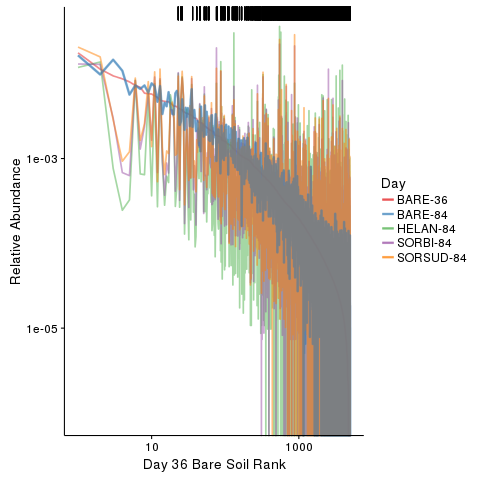

In [234]:
%%R
p3

In [ ]:
## format for 

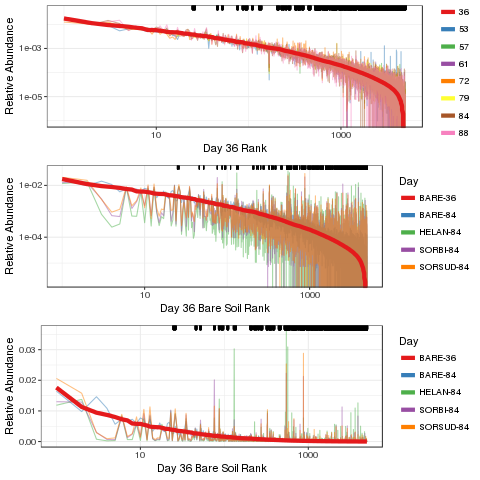

In [58]:
%%R
grid.arrange(p1,p3,p2, ncol = 1)

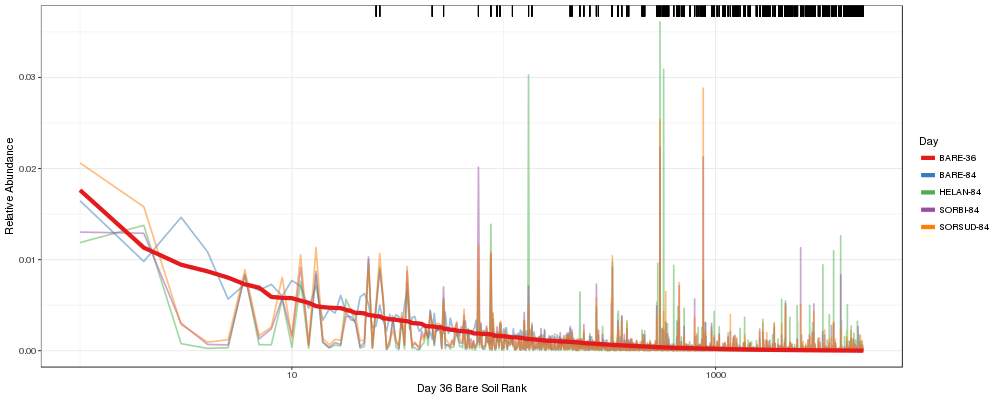

In [75]:
%%R -w 1000 -h 400
p2


# by day Rhizosphere samples and bulk 36

In [113]:
%%R
physeq.Plant = subset_samples(physeq.Full, Planted == "Rhizosphere" | DAP == 36 & Plant == "BARE" , TRUE)

mdf = psmelt(physeq.Plant)
physeq.Plant = NULL



In [114]:
%%R
head(mdf)

          OTU            Sample Abundance          X.sample Library
821181 OTU.84 sample3-3.30_Npos 0.2773169 sample3-3.30_Npos       2
271824 OTU.20 sample2-2.10_Nneg 0.2432191 sample2-2.10_Nneg       2
271887 OTU.20 sample2-1.08_Nneg 0.1414608 sample2-1.08_Nneg       1
747536  OTU.7 sample5-3.17_Nneg 0.1369265 sample5-3.17_Nneg       1
452845  OTU.3 sample5-3.13_Nneg 0.1360758 sample5-3.13_Nneg       1
578452  OTU.4 sample3-4.18_Nneg 0.1355695 sample3-4.18_Nneg       2
       Primer_Plate Primer_Well_ID primerFR_ID_byPlate primerFR_ID_total
821181            1            E12                  93                93
271824            1             A2                   9                 9
271887            1             A7                  49                49
747536            1             E2                  13                13
452845            2             E1                   5               101
578452            1             A3                  17                17
       barcod

In [115]:
%%R
# split dataframe by day and OTU, sumarize mean abundance
mdf.byday = ddply(mdf, .(DAP, Planted, OTU), summarize, mean_day_abundance = mean(Abundance))
head(mdf.byday)

  DAP Planted       OTU mean_day_abundance
1  36    BARE    OTU.10       1.881108e-03
2  36    BARE   OTU.100       2.943948e-03
3  36    BARE  OTU.1000       5.313401e-05
4  36    BARE OTU.10004       1.019494e-04
5  36    BARE OTU.10009       2.386498e-06
6  36    BARE  OTU.1001       0.000000e+00


In [116]:
%%R
#Order by day, then rank abundance within day
mdf.byday = mdf.byday[order( mdf.byday$DAP, -mdf.byday$mean_day_abundance),]
#Subset to first bulk soil day
mdf.36 = subset(mdf.byday, DAP == 36 & Planted == "BARE")

mdf.36$Rank = rank(-mdf.36$mean_day_abundance, ties.method = "random")
mdf.byday.ranked = join(mdf.byday, mdf.36[,c("OTU","Rank")], by = "OTU")

head(mdf.byday.ranked)

  DAP     Planted    OTU mean_day_abundance Rank
1  36 Rhizosphere  OTU.8        0.020629371  547
2  36        BARE  OTU.6        0.017623251    1
3  36 Rhizosphere  OTU.4        0.012971579  274
4  36        BARE OTU.28        0.011306851    2
5  36 Rhizosphere OTU.11        0.010989811    3
6  36        BARE OTU.11        0.009433516    3


In [117]:
%%R
FDR = 0.05

# read rhizosphere log2fold change file and 
l2f = read.csv(log2foldFile, header = TRUE) 

df.l2fc.rspndr = l2f %>%
    filter(Day == 84 & log2FoldChange > 0) %>%
    group_by(OTU) %>%
     summarize(minP = min(p.adj)) %>% 
     filter(minP <= FDR)

In [118]:
%%R
head(df.l2fc.rspndr)

# A tibble: 6 × 2
        OTU         minP
     <fctr>        <dbl>
1    OTU.10 9.458241e-20
2   OTU.101 1.822706e-03
3  OTU.1010 4.076361e-02
4  OTU.1016 2.854686e-03
5 OTU.10219 1.004318e-02
6 OTU.10249 1.877634e-02


In [119]:
%%R

d.rhiz = left_join(df.l2fc.rspndr, mdf.byday.ranked)


In [120]:
%%R
mdf.byday.ranked$Planted_Day = paste(mdf.byday.ranked$Planted, mdf.byday.ranked$DAP, sep = "-")

In [121]:
%%R -w 1000 -h 350

getPalette = colorRampPalette(brewer.pal(9, "Set1"))

p = ggplot(mdf.byday.ranked, aes(x = Rank, y = mean_day_abundance, color = Planted_Day)) 

#p = p + geom_vline(data = d.rhiz, aes(xintercept = Rank), color = "#377eb8", alpha = 0.25, size = 1)
#p = p + geom_vline(data = d.xyl, aes(xintercept = Rank), color = "#4daf4a", alpha = 0.25, size = 1)

p = p + geom_line(alpha = 0.5, size = 0.8) 

#p = p + geom_rug(data = d.cell, color = "black", sides = "b", size = 1.25)
p = p + geom_rug(data = d.rhiz, color = "black", sides = "t", size = .5)

p = p + geom_line(data = subset(mdf.byday.ranked, Planted == "BARE"), size = 2)

p = p + scale_color_manual(values=getPalette(9))

p = p + scale_y_log10()

p = p + scale_x_log10()

p = p + theme_bw()

p = p + labs(x = "Day 36 Bare Soil Rank", y = "Relative Abundance", color = "Day")

p4 = p 

# Use B73 for rank abundance and plot maize variation on the same day

In [96]:
%%R
physeq.Plant = subset_samples(physeq.Full, DAP == 84 , TRUE)

mdf = psmelt(physeq.Plant)
physeq.Plant = NULL



In [97]:
%%R
# split dataframe by day and OTU, sumarize mean abundance
mdf.byplant = ddply(mdf, .(Plant, OTU), summarize, mean_plant_abundance = mean(Abundance))
head(mdf.byplant)

  Plant       OTU mean_plant_abundance
1   B73    OTU.10         2.055621e-02
2   B73   OTU.100         1.196080e-03
3   B73  OTU.1000         3.497794e-05
4   B73 OTU.10004         6.959503e-05
5   B73 OTU.10009         4.747308e-05
6   B73  OTU.1001         3.801253e-05


In [103]:
%%R
#Order by day, then rank abundance within day
mdf.byplant = mdf.byplant[order(mdf.byplant$Plant, -mdf.byplant$mean_plant_abundance),]

#Subset to first bulk soil day
mdf.B73 = subset(mdf.byplant, Plant == "B73")
mdf.B73$Rank = rank(-mdf.B73$mean_plant_abundance, ties.method = "random")
mdf.byplant.ranked = join(mdf.byplant, mdf.B73[,c("OTU","Rank")], by = "OTU")

head(mdf.byplant.ranked)

  Plant    OTU mean_plant_abundance Rank
1   B73  OTU.3           0.04035030    1
2   B73  OTU.7           0.04032706    2
3   B73  OTU.9           0.03414476    3
4   B73  OTU.8           0.02222233    4
5   B73 OTU.10           0.02055621    5
6   B73  OTU.4           0.02021365    6


In [104]:
%%R
FDR = 0.05

# read rhizosphere log2fold change file and 
l2f = read.csv(log2foldFile, header = TRUE) 

df.l2fc.rspndr = l2f %>%
    filter(Day == 79 & log2FoldChange > 0) %>%
    group_by(OTU) %>%
     summarize(minP = min(p.adj)) %>% 
     filter(minP <= FDR)

In [105]:
%%R

d.rhiz = left_join(df.l2fc.rspndr, mdf.byplant.ranked)


In [88]:
%%R
#mdf.byplant.ranked$Planted_Day = paste(mdf.byday.ranked$Planted, mdf.byday.ranked$DAP, sep = "-")

In [122]:
%%R -w 1000 -h 350

getPalette = colorRampPalette(brewer.pal(9, "Set1"))

p = ggplot(mdf.byplant.ranked, aes(x = Rank, y = mean_plant_abundance, color = Plant)) 

#p = p + geom_vline(data = d.rhiz, aes(xintercept = Rank), color = "#377eb8", alpha = 0.25, size = 1)
#p = p + geom_vline(data = d.xyl, aes(xintercept = Rank), color = "#4daf4a", alpha = 0.25, size = 1)

p = p + geom_line(data = subset(mdf.byplant.ranked, Plant != "BARE"), alpha = 0.5, size = 0.8) 

#p = p + geom_rug(data = d.cell, color = "black", sides = "b", size = 1.25)
p = p + geom_rug(data = d.rhiz, color = "black", sides = "t", size = .5)

p = p + geom_line(data = subset(mdf.byplant.ranked, Plant == "B73"), size = 2)

p = p + scale_color_manual(values=getPalette(9))

p = p + scale_y_log10()

p = p + scale_x_log10()

p = p + theme_bw()

p = p + labs(x = "B73 Rank", y = "Relative Abundance", color = "Day")

p5 = p 

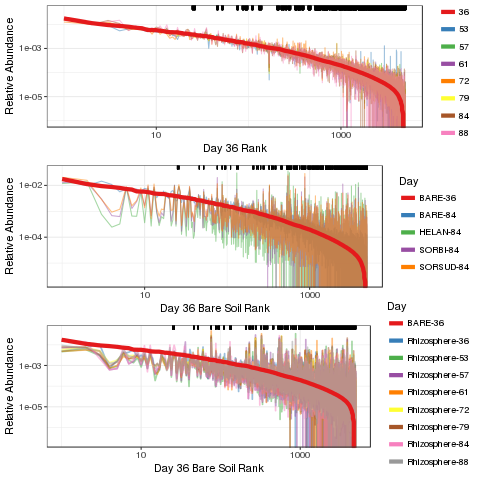

In [125]:
%%R
grid.arrange(p1, p3, p4, ncol = 1)

In [88]:
%%R
#mdf.byplant.ranked$Planted_Day = paste(mdf.byday.ranked$Planted, mdf.byday.ranked$DAP, sep = "-")